## Walker Branch Watershed Forcing for DEMENTpy

**Bin Wang(wangb@ornl.gov)**

**11/25/2022**

----

This Jupyter Notebook serves to prepare forcing for [DEMENTpy](https://github.com/bioatmosphere/DEMENTpy) at WBW. DEMENTpy needs temperature and water potential at a daily time step.



**Data Source**

-- https://walkerbranch.ornl.gov/long-term-data/

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
wbw_data = pd.read_csv("WBW_climate_soil_temperature.csv")
wbw_data.head()

,DATE,PAR_INT,RAD_INT,RAD_DAILY,PRECIP,AIR_T_MIN,AIR_T_MEAN,AIR_T_MAX,RH_MIN,RH_MEAN,RH_MAX,SOIL_T_MIN,SOIL_T_MEAN,SOIL_T_MAX,WIND_SPEED
0,19930101,8.04,3.61,41.77,1.0,1.58,4.79,9.73,65.17,74.86,84.32,6.86,6.93,7.00,-9999.0
1,19930102,8.04,3.61,41.77,0.0,1.58,4.88,9.73,65.17,75.01,84.32,6.73,6.79,6.86,-9999.0
2,19930103,8.04,3.61,41.77,0.0,1.58,4.97,9.73,65.17,75.67,87.02,6.59,6.66,6.72,-9999.0
3,19930104,10.04,4.54,52.50,12.0,4.66,7.47,11.97,66.46,86.93,98.50,6.46,6.52,6.59,-9999.0
4,19930105,10.66,5.09,58.87,5.0,3.85,8.90,13.02,75.91,91.80,101.00,6.33,6.39,6.46,-9999.0


In [7]:
wbw_data.tail()

,DATE,PAR_INT,RAD_INT,RAD_DAILY,PRECIP,AIR_T_MIN,AIR_T_MEAN,AIR_T_MAX,RH_MIN,RH_MEAN,RH_MAX,SOIL_T_MIN,SOIL_T_MEAN,SOIL_T_MAX,WIND_SPEED
6569,20101227,20.85,9.07,105.00,0.0,-7.67,-2.35,2.81,41.32,71.95,100.3,4.30,4.91,5.44,0.74
6570,20101228,6.27,2.90,33.51,0.0,-4.04,-0.67,1.51,62.61,83.36,101.1,4.61,4.93,5.22,0.54
6571,20101229,10.57,4.93,57.10,0.2,1.17,5.45,9.79,49.54,70.99,98.3,5.24,5.89,6.56,0.59
6572,20101230,8.01,3.68,42.63,2.3,7.06,10.46,14.45,61.52,72.93,103.7,6.58,7.15,7.82,0.57
6573,20101231,2.63,1.12,13.02,63.0,5.83,10.46,13.21,99.80,104.43,106.7,7.87,9.22,9.91,0.92


In [10]:
wbw_data_copy = wbw_data.copy()

In [13]:
wbw_data_copy[wbw_data[:] == -9999.0] = 0.0

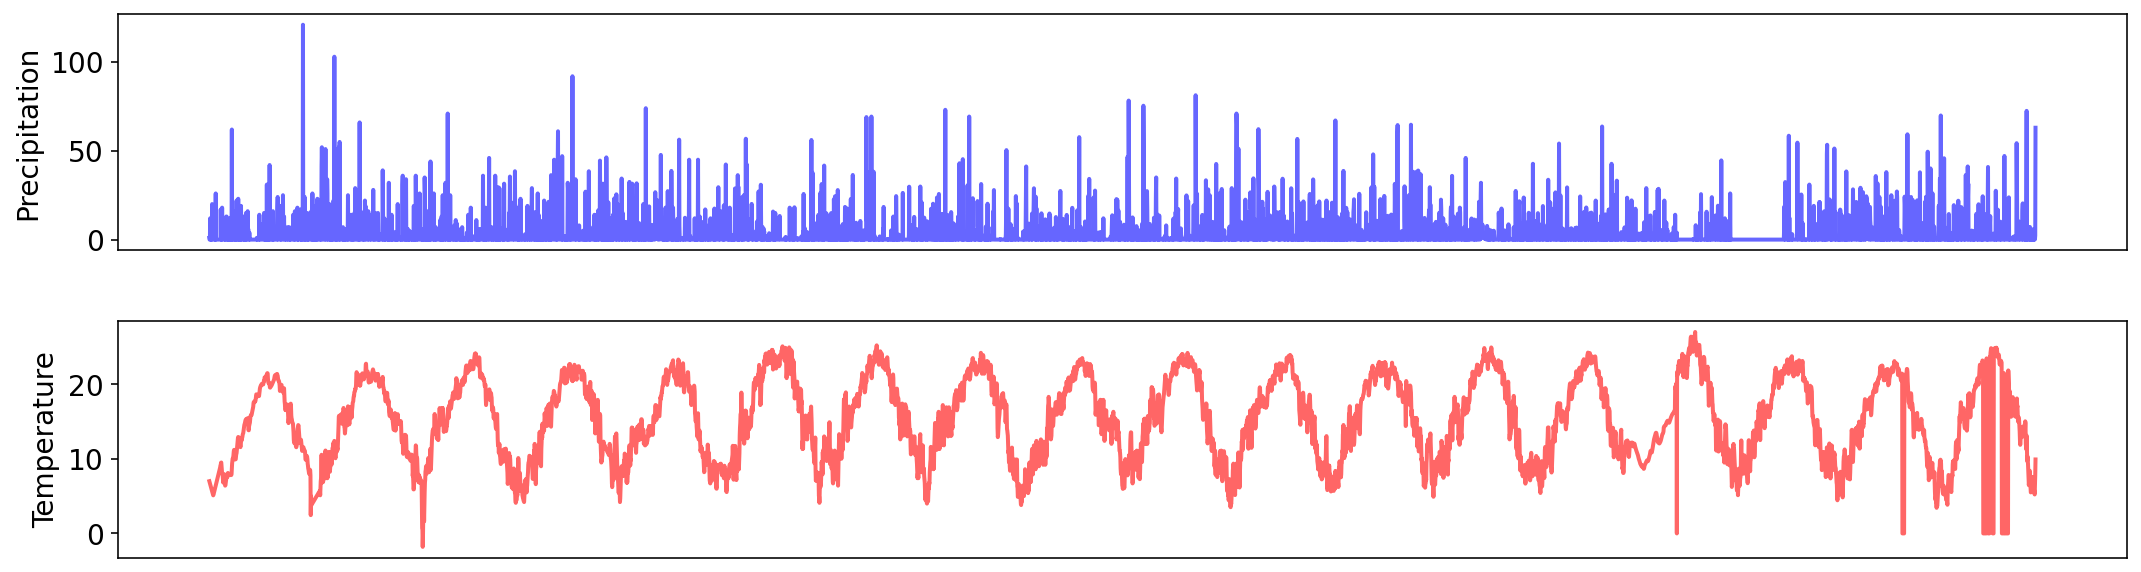

In [16]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

ax1.plot(wbw_data_copy['PRECIP'],color='blue',linewidth=2,alpha=0.6)
#ax1.plot(base['Psi'],color='blue',linewidth=2)
ax1.set_ylabel('Precipitation',size=14)
#ax1.set_xlim(-10,365*year+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


ax2.plot(wbw_data_copy['SOIL_T_MAX'],color='red',linewidth=2,alpha=0.6)    
#ax2.plot(base['Temp'],color='blue',linewidth=2)
ax2.set_ylabel('Temperature',size=14)
#ax2.set_xlim(-10,365*year+10)
ax2.tick_params(bottom=False,labelbottom=False, labelsize=14)    

#for i in range(year-1):
#    ax2.axvline(x=365*(i+1)-1, color='k',linestyle=':',lw=2)
    
plt.subplots_adjust(hspace=0.3)

plt.show()